In [15]:
import requests
from bs4 import BeautifulSoup
from urllib.parse import urljoin

import time


In [55]:
def fetch_course_list(url):
    time.sleep(1)
    r = requests.get(urljoin(url, "courses/"))
    doc = BeautifulSoup(r.text, "html.parser")
    courses = {}
    
    for course in doc.select("a[data-name]"):
        attrs = course.attrs
        name = attrs["data-name"]
        courses[name] = {
            "name": name,
            "difficulty": attrs["data-difficulty"],
            "url": urljoin(url, attrs["href"]),
        }
    
    return list(courses.items())

In [49]:
def fetch_course(course):
    time.sleep(1)
    print(course['url'])
    r = requests.get(course['url'])
    doc = BeautifulSoup(r.text, "html.parser")
    
    prerequisites = []
    nextsteps = []
    
    for div in doc.select(".modal-body > div"):
        title = div.select_one("h2")
        print(title)
        if title and title.text.strip() == "Prerequisites":
            for prerequisite in div.select("li a[data-name]"):
                prerequisites.append(prerequisite.attrs["data-name"])
        if title and title.text.strip() == "Next steps":
            for nextstep in div.select("li a[data-name]"):
                nextsteps.append(nextstep.attrs["data-name"])

    return {
        "course": course,
        "nextsteps": nextsteps,
        "prerequisites": prerequisites,
    }

In [69]:
course_list = fetch_course_list("https://💎.org/")
courses = []
for course in course_list:
    courses.append(fetch_course(course[1]))

https://brilliant.org/courses/probability/
<h2 class="padding">Prerequisites</h2>
None
<h2 class="padding">Next steps</h2>
https://brilliant.org/courses/dynamics-bootcamp/
<h2 class="padding">Prerequisites</h2>
None
<h2 class="padding">Next steps</h2>
https://brilliant.org/courses/logic-deduction/
<h2 class="padding">Prerequisites</h2>
None
<h2 class="padding">Next steps</h2>
https://brilliant.org/courses/algebra-fundamentals/
<h2 class="padding">Prerequisites</h2>
None
<h2 class="padding">Next steps</h2>
https://brilliant.org/courses/artificial-neural-networks/
<h2 class="padding">Prerequisites</h2>
None
<h2 class="padding">Next steps</h2>
https://brilliant.org/courses/calculus-done-right/
<h2 class="padding">Prerequisites</h2>
None
<h2 class="padding">Next steps</h2>
https://brilliant.org/courses/computer-science-fundamentals/
<h2 class="padding">Prerequisites</h2>
None
<h2 class="padding">Next steps</h2>
https://brilliant.org/courses/math-fundamentals/
<h2>Next steps</h2>
https://br

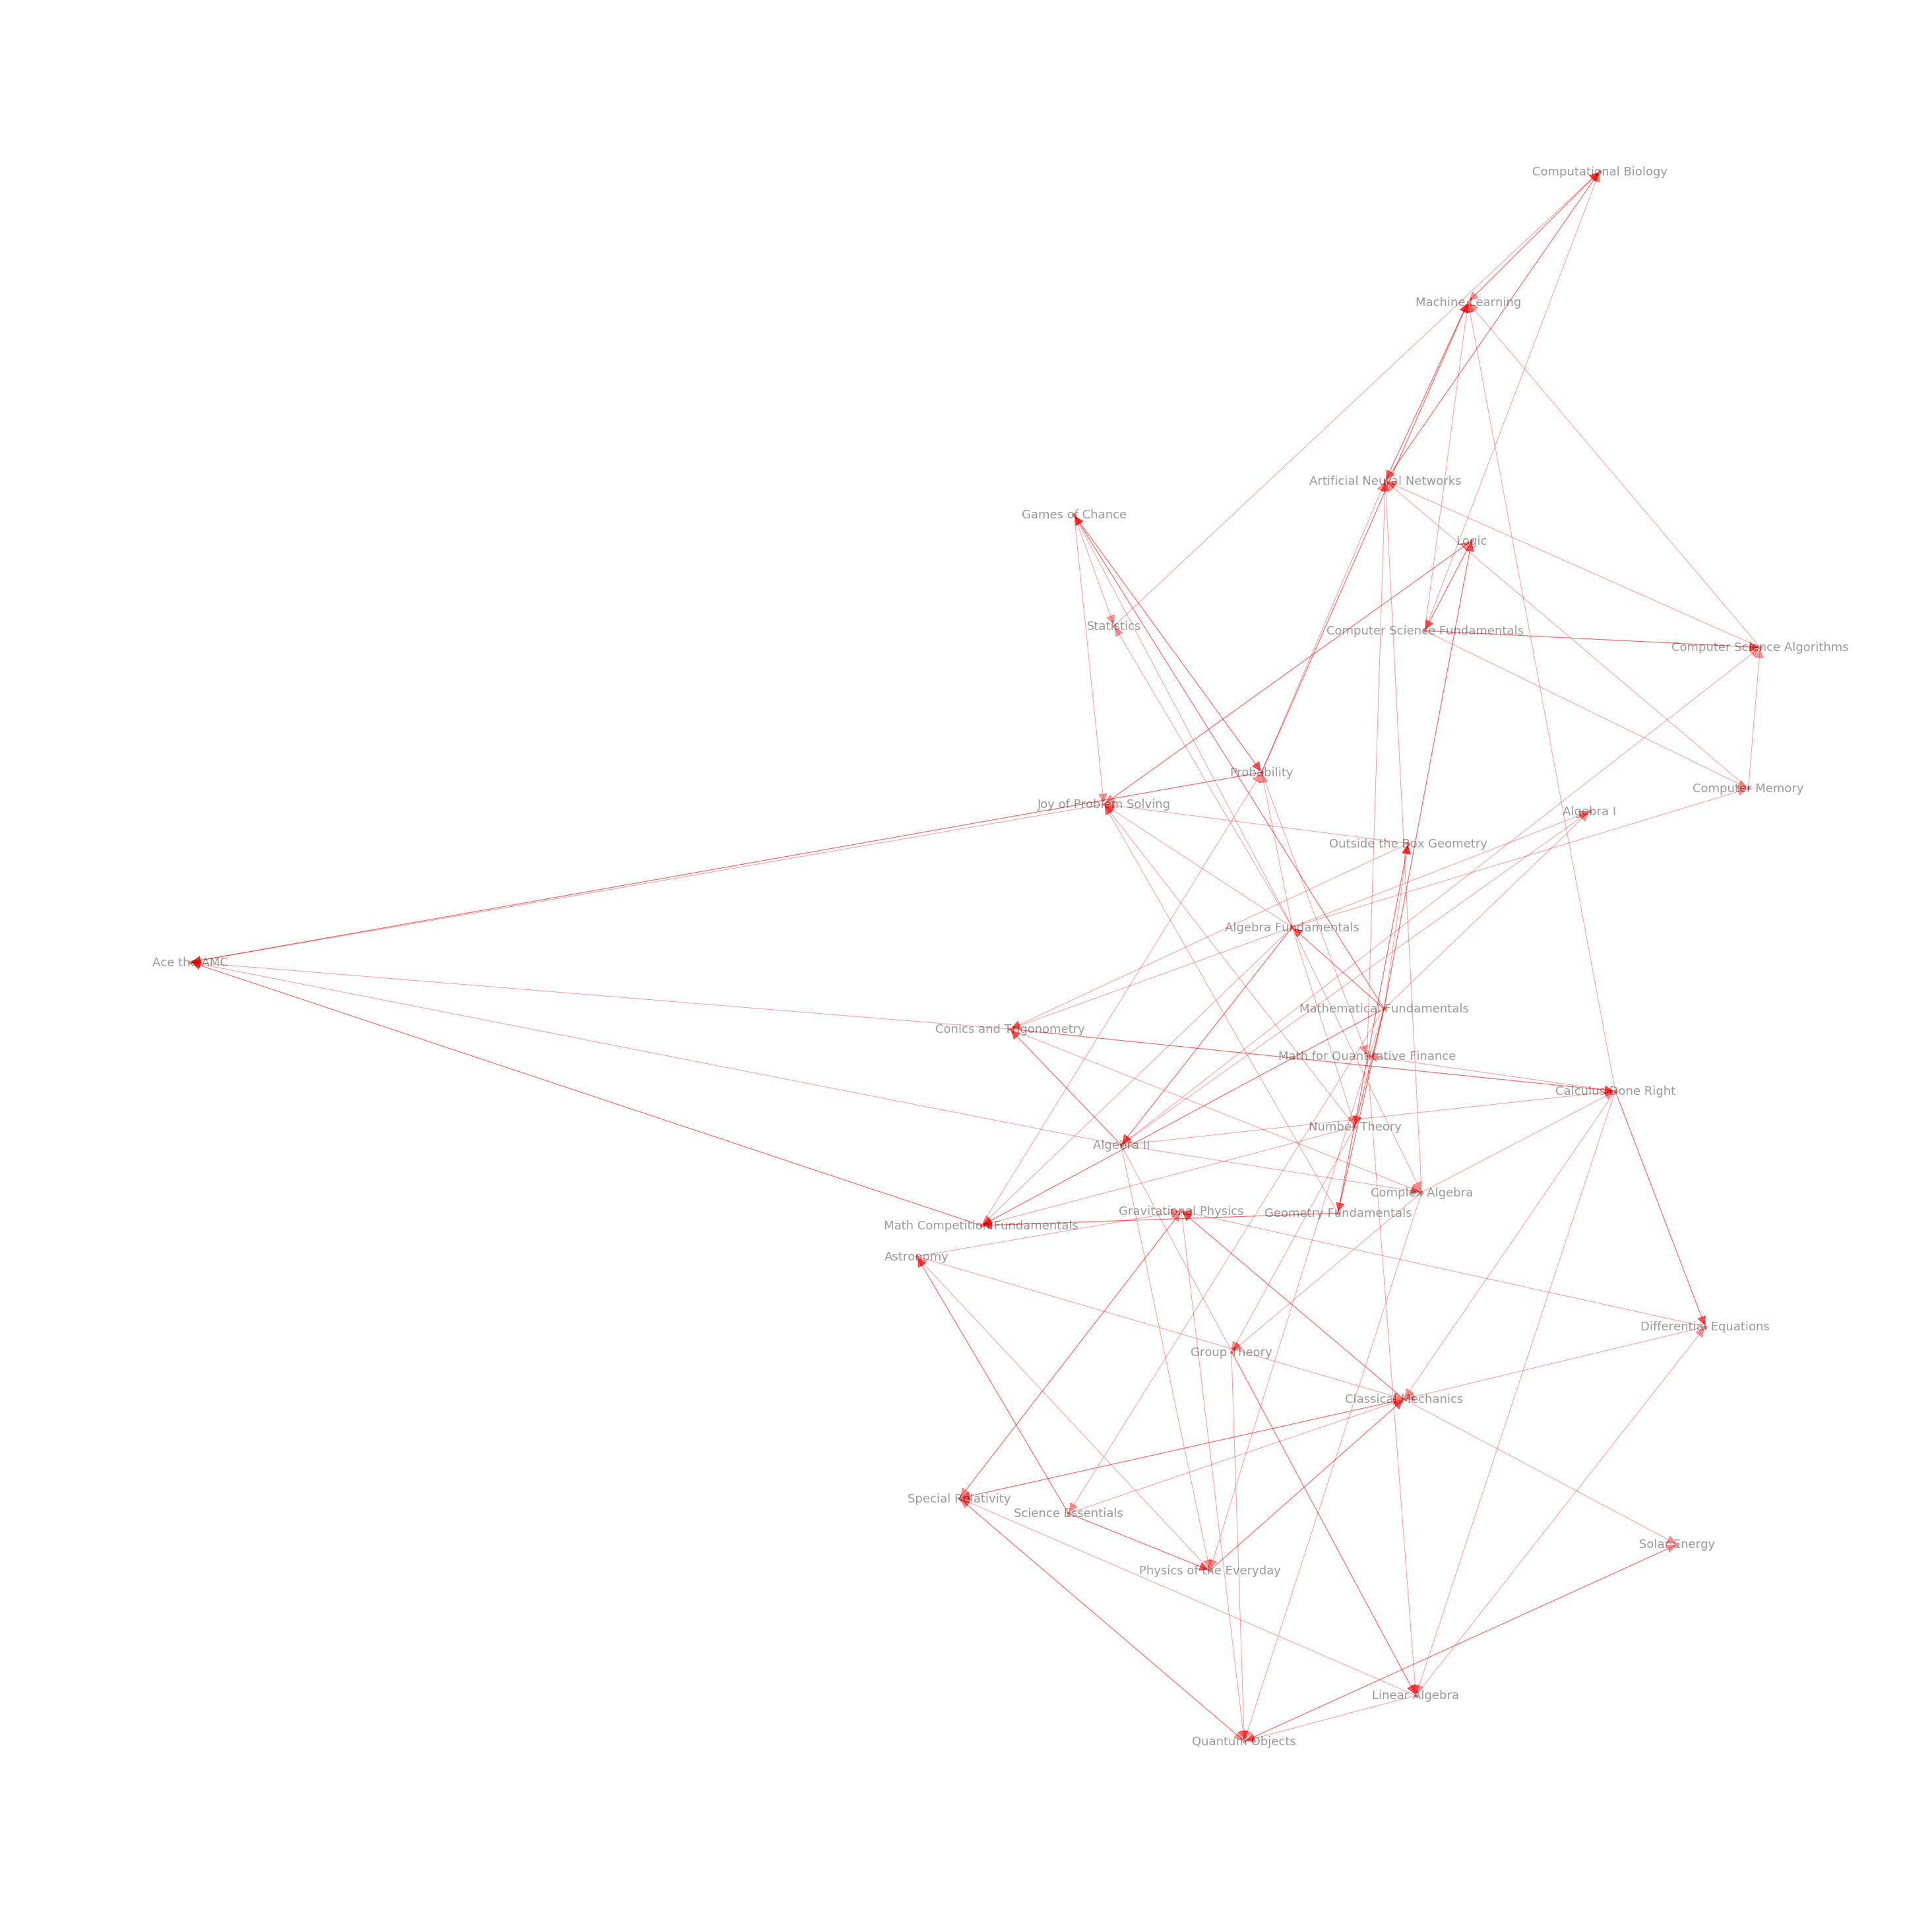

In [75]:
# print(courses)

%matplotlib inline
import matplotlib.pyplot as plt
import networkx as nx
import matplotlib

matplotlib.rcParams['figure.figsize'] = (40, 40)

# prepare data
edges_source = []
for course in courses:
    course_name = course["course"]["name"]
    for p in course["prerequisites"]:
        edges_source.append((p, course_name))
    for n in course["nextsteps"]:
        edges_source.append((course_name, n))

G = nx.MultiDiGraph()
G.add_edges_from(edges_source)

# draw graph
pos = nx.spring_layout(G, iterations=10)
nx.draw(G, pos, node_size=20, alpha=0.4, arrowsize=30, edge_color='r', font_size=18, with_labels=True)
plt.show()
